This notebook will walk through a comparison of different thresholding approaches for fMRI data.  The example data used here are from the UCLA CNP Dataset; the specific contrast used is the comparison of go trials to baseline for the stop signal task.  Data are from the first 125 subjects in the dataset; these data were used to generate datasets of smaller sizes (25,50,75, and 100 subjects) for comparison across different smaple sizes.  

First we need to set up our environment.  

In [90]:
import nibabel
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting
import scipy.stats

%matplotlib inline

Now let's load up the data files for each of the datasets, starting with the raw t statistic maps.

In [91]:
nvals=[25,50,75,100,125]
tstat={}
for n in nvals:
    tstat[n]=nibabel.load('data/tt_%dsubs_tstat1.nii.gz'%n).get_data()


In [92]:
maskimg=nibabel.load('data/mask.nii.gz')
mask=maskimg.get_data()
maskvox=numpy.where(mask>0)

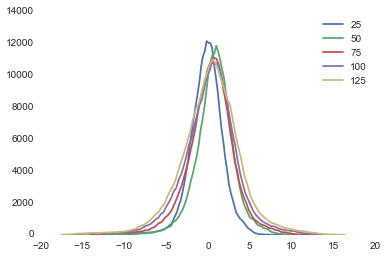

In [93]:
for n in nvals:
    h,b=numpy.histogram(tstat[n][maskvox],bins=100)
    plt.plot(b[1:],h)
plt.legend(nvals)


First get maps using uncorrected p<0.001

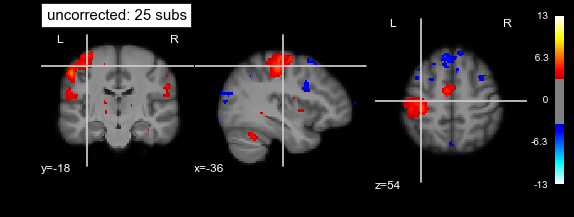

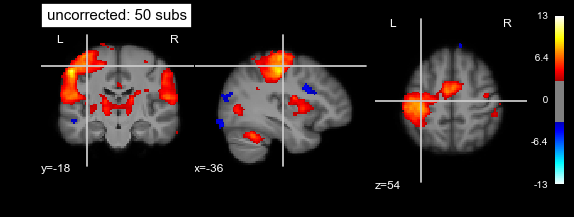

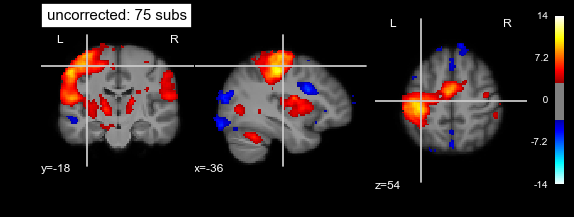

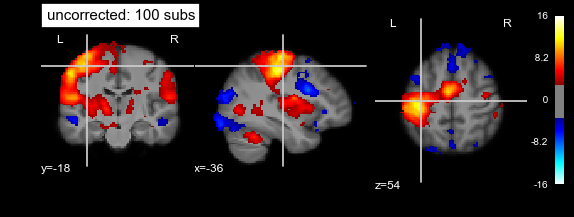

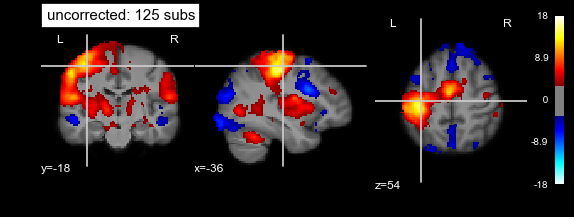

In [94]:
unc_nvox={}
for n in nvals:
    cutoff=scipy.stats.t.ppf(1.-0.001,n)
    unc_nvox[n]=numpy.sum(tstat[n]>cutoff)
    plotting.plot_stat_map('data/tt_%dsubs_tstat1.nii.gz'%n, bg_img='data/bg_image.nii.gz',
                       threshold=cutoff, title="uncorrected: %d subs"%n,
                       cut_coords=(-36,-18,54))


Now load the GRF maps created using FSL's cluster tool.


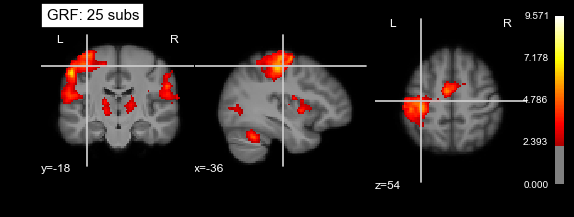

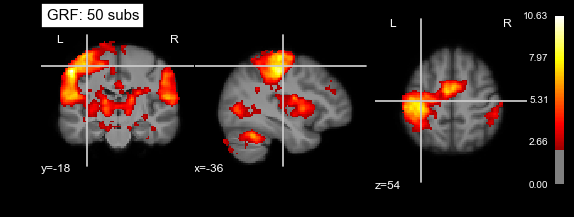

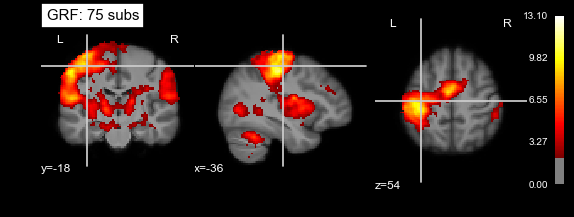

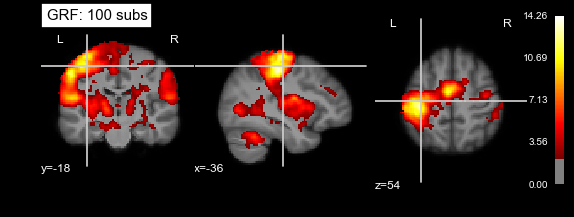

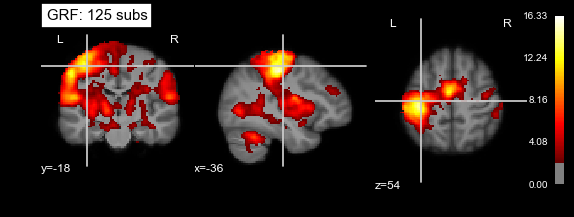

In [95]:
grfdata={}
grf_nvox={}
for n in nvals:
    img=nibabel.load('data/thresh_%dsubs.nii.gz'%n)
    grfdata[n]=img.get_data()
    grf_nvox[n]=numpy.sum(grfdata[n]>0)
    plotting.plot_stat_map('data/thresh_%dsubs.nii.gz'%n, bg_img='data/bg_image.nii.gz',
                       threshold=2.3, title="GRF: %d subs"%n,
                       cut_coords=(-36,-18,54))
    

Now do the same for FDR data

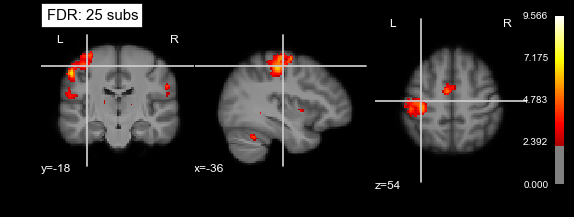

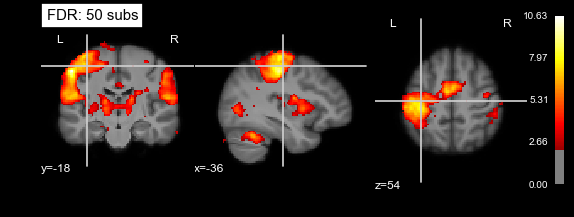

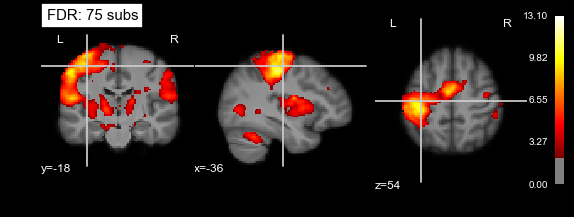

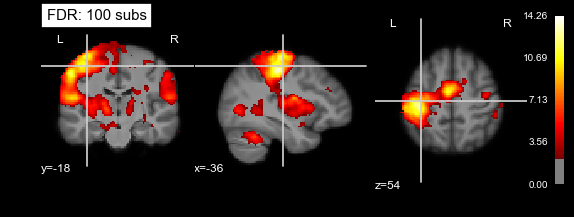

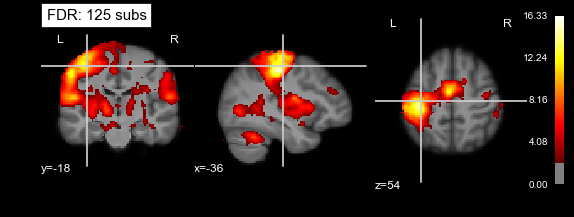

In [96]:
fdrdata={}
fdr_nvox={}
for n in nvals:
    img=nibabel.load('data/fdr_tstat_%dsubs.nii.gz'%n)
    grfdata[n]=img.get_data()
    grf_nvox[n]=numpy.sum(grfdata[n]>0)
    plotting.plot_stat_map(img, bg_img='data/bg_image.nii.gz',
                       threshold=2.3, title="FDR: %d subs"%n,
                       cut_coords=(-36,-18,54))


Now load the nonparametric results (obtained using FSL's randomise)

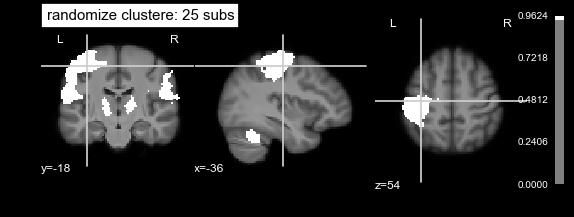

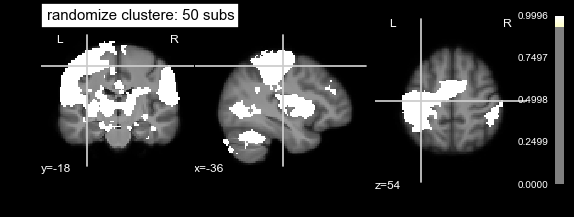

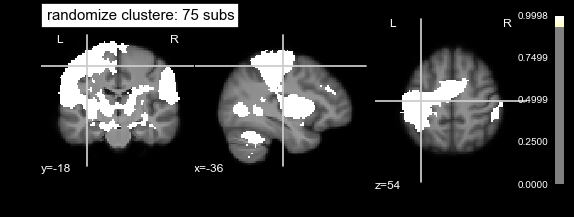

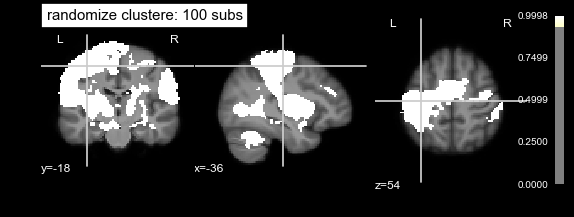

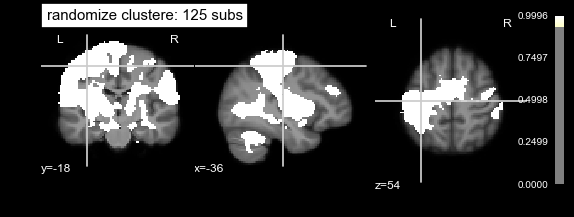

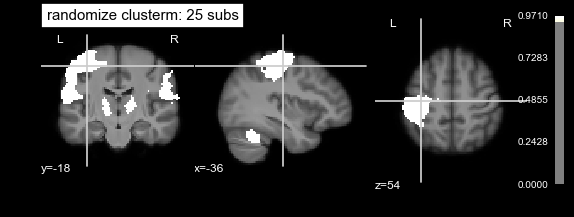

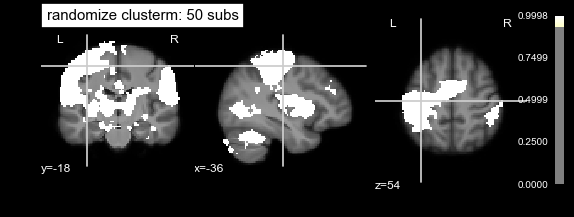

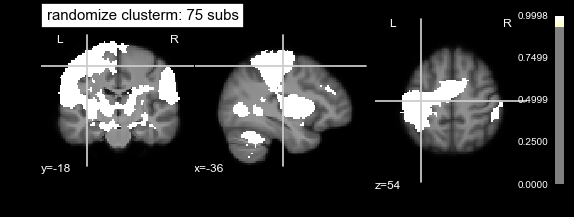

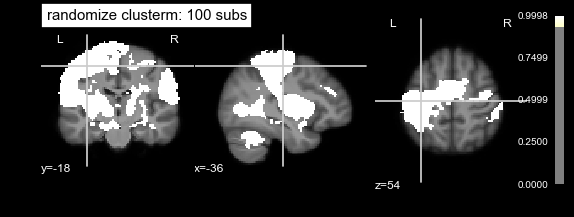

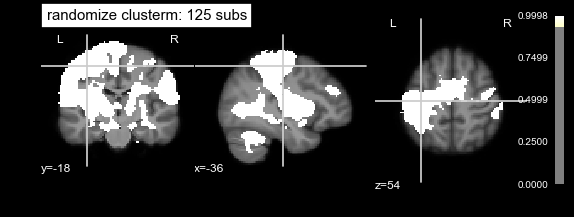

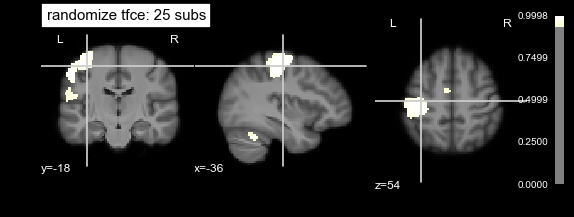

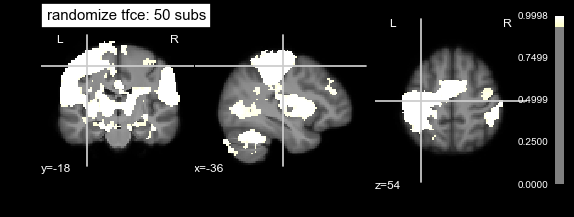

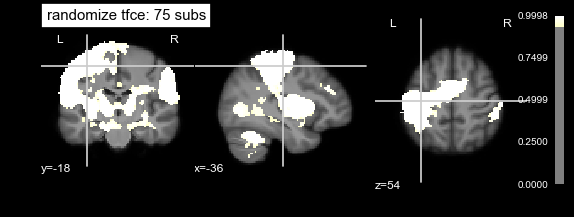

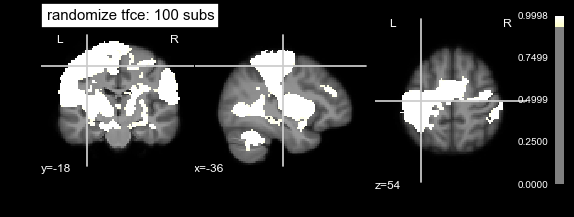

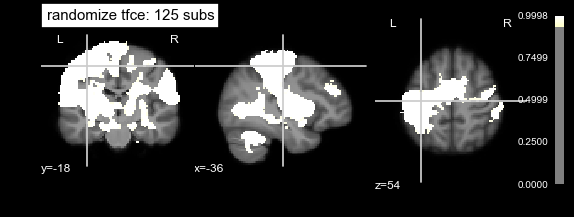

In [97]:
randdata={'clustere':{},'clusterm':{},'tfce':{}}

rand_nvox={'clustere':{},'clusterm':{},'tfce':{}}
for type in ['clustere','clusterm','tfce']:
  for n in nvals:
    imgfile='data/randomize_%dsubs/tt_%dsubs_%s_corrp_tstat1.nii.gz'%(n,n,type)
    img=nibabel.load(imgfile)
    randdata[type][n]=img.get_data()
    rand_nvox[type][n]=numpy.sum(randdata[type][n]>0)
    plotting.plot_stat_map(img, bg_img='data/bg_image.nii.gz',
                       threshold=0.95, title="randomize %s: %d subs"%(type,n),
                       cut_coords=(-36,-18,54))


In [98]:
rand_nvox


{'clustere': {25: 16948, 50: 47130, 75: 43560, 100: 49626, 125: 56019},
 'clusterm': {25: 16958, 50: 47137, 75: 43560, 100: 49626, 125: 56019},
 'tfce': {25: 62334, 50: 120358, 75: 100861, 100: 104069, 125: 101669}}

Now get the variance-normalized versions of the randomize results

In [99]:
TBD

NameError: name 'TBD' is not defined

Now plot the number of active voxels for each method as a function of sample size

In [101]:
nvox_data=numpy.zeros((len(nvals),5))
for i in range(len(nvals)):
    nv=nvals[i]
    nvox_data[i,0]=unc_nvox[nv]
    nvox_data[i,1]=grf_nvox[nv]
    nvox_data[i,2]=rand_nvox['clustere'][nv]
    nvox_data[i,3]=rand_nvox['clusterm'][nv]
    nvox_data[i,4]=rand_nvox['tfce'][nv]

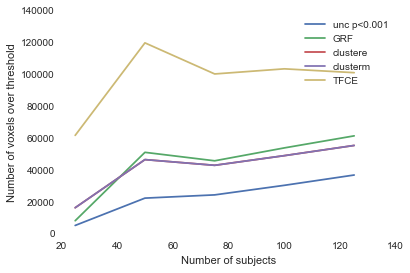

In [108]:
plt.plot(nvals,nvox_data)
plt.legend(['unc p<0.001','GRF','clustere','clusterm','TFCE'])
plt.xlabel('Number of subjects')
plt.ylabel('Number of voxels over threshold')

In [107]:
?plt.plot
